# Descriptive analysis on global Super Store Data

Shopping online is currently the need of the hour. Because of this COVID, it's not easy to walk in a store randomly and buy anything you want. I this I am trying to understand a few things like

**Customers Analysis**

* Profile the customers based on their frequency of purchase - calculate frequency of purchase for each customer
* Do the high frequent customers are contributing more revenue
* Are they also profitable - what is the profit margin across the buckets
* Which customer segment is most profitable in each year.
* How the customers are distributed across the countries- -

**Product Analysis**

* Which country has top sales?
* Which are the top 5 profit-making product types on a yearly basis
* How is the product price varying with sales - Is there any increase in sales with the decrease in price at a day level
* What is the average delivery time across the counties - bar plot

I will keep updating the analysis.

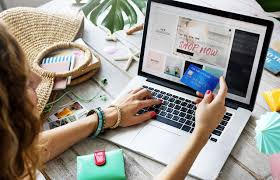

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('/kaggle/input/global-super-store-dataset/Global_Superstore2.xlsx')

In [ ]:
df.head()

Customers Analysis:

1. Profile the customers based on their frequency of purchase - calculate frequency of purchase for each customer and plot a histogram to get the threshold for Low/Mid/High frequency customers

2. Does the high frequent customers are contributing more revenue

3. Are they also profitable - what is the profit margin across the buckets

4. Which customer segment is most profitable in each year ( there is a column called customer segment)

5. How the customers are distributed across the countries - pie chart 

6. Write a function to split the global store data into different unique data frames based on the unique values in country column [Means, we should have one data frame for one country as function output ]  

In [ ]:
df.info()

In [ ]:
df.shape

We can see that the data has 51290 data entries with 24 features.

In [ ]:
df.describe()
# can see that there is negetive trend in profit
# in sales  data is either right skewed or there are too many outliers
# the discount falls in the range of 75% - 100%

In [ ]:
df.isnull().sum()

In [ ]:
# We can see that only the postal code attribute has 41,296 null vlues. Thats almost 80 % of the values in the column are null

In [ ]:
df.isnull().sum()

EDA (To get a better understanding of thr data)

lets understand how many of them are categorical and how many unique values each categorical columns have,

In [ ]:
cat_cols = df.select_dtypes(exclude=['int64','float64']).columns
cat_cols

In [ ]:
# num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_colms = df._get_numeric_data()
num_colms.head()
# df['Ship Mode'].unique()
# df['Ship Mode'].value_counts()
# df['Segment'].value_counts()
# df['Market'].value_counts()
# df['Region'].value_counts()
# df['Category'].value_counts()
# df['Sub-Category'].value_counts()
# df['Product Name'].value_counts()
# df['Order Priority'].value_counts()

### Customer Analysis

#1. Profile the customers based on their frequency of purchase - calculate frequency of purchase for each customer and 
#plot a histogram to get the threshold 
#for Low/Mid/High frequency customers

In [ ]:
# purchase frequency = no of orders / no of unique customers (365 days)
# df['Order ID'].groupby('Customer ID').count()

In [ ]:
df.nunique()

In [ ]:
df_customer = df[['Customer ID','Order ID','Order Date', 'Ship Date', 'Ship Mode','Country']]
# .drop_duplicates()
df_customer.count()

In [ ]:
df_customer1 = df[['Customer ID','Order ID','Order Date', 'Ship Date', 'Ship Mode','Country']].drop_duplicates()
df_customer1.count()

In [ ]:
# df2 = df.drop_duplicates()
# df2.shape
# df_customer[[df_customer['Customer ID','Order ID','Order Date']].duplicated() == True]
# df_customer['Customer ID'].nunique()
df_customer1.head()

In [ ]:
df_customer1['Customer ID'].nunique()
# there are only 1590 unique customer ids out of 25754 rows in the customer data

In [ ]:
# First_Purchase_Date = pd.to_datetime(df['Order Date']).min()
# latest_purchase_date = pd.to_datetime(df['Order Date']).max()
# Total_shipping_cost = df['Shipping Cost'].sum()
# total_sales = df['Sales'].sum()
# unique_order_id = df['Order_id'].nunique()


def new_features(x):
    d = []
    d.append(x['Order ID'].nunique())
    d.append(x['Sales'].sum())
    d.append(x['Shipping Cost'].sum())
    d.append(pd.to_datetime(x['Order Date']).min())
    d.append(pd.to_datetime(x['Order Date']).max())
    d.append(x['City'].nunique())
    return pd.Series(d, index=['Purchases','Total_Sales','Total_Cost','First_Purchase_Date','Latest_Purchase_Date','Location_Count'])

df_customer_new = df.groupby('Customer ID').apply(new_features)

In [ ]:
df_customer_new.columns

In [ ]:
from datetime import datetime
df_customer_new['Duration'] = (df_customer_new['Latest_Purchase_Date'] - df_customer_new['First_Purchase_Date']).dt.days

In [ ]:
df_customer_new['Frequency'] = df_customer_new['Duration']/df_customer_new['Purchases']
df_customer_new['Frequency'].head()

In [ ]:
df_customer_new.head()

In [ ]:
df_customer_new['Frequency'].describe()

In [ ]:
# df_customer_new['Duration'].describe()
# Total time duration = approx 3.7 years

In [ ]:
# 1. Profile the customers based on their frequency of purchase - calculate frequency of purchase for
# each customer and plot a histogram to get the threshold for Low/Mid/High frequency customers

plt.hist(df_customer_new['Frequency'], bins=3)
plt.xlabel('frequency of purchase')
plt.show()

In [ ]:
# bucketing continuous data
def freq(x):
    if x < 219:
        return 'Low' 
    elif x < 436:
        return 'Mid' 
    else:
        return 'High'

df_customer_new['freq_range'] = df_customer_new.Frequency.apply(freq)

df_customer_new['freq_range'].value_counts()

In [ ]:
# profiling based on purchase frequency
df_customer_new.head()

2.Are the high frequent customers contributing more revenue

In [ ]:
result = df.groupby(["Customer Name"])['Profit'].aggregate(np.sum).reset_index().sort_values('Profit',ascending = False).head(20)

In [ ]:
# revenue = sales *  quantity 

In [ ]:
df_customer_new['Revenue'] = df_customer_new['Purchases'] *  df_customer_new['Total_Sales']

In [ ]:
sns.catplot(x="freq_range", y="Revenue", kind="bar", data=df_customer_new);

From the graph we can see that the high frequent customers are contrinuting less

3. Are they also profitable - what is the profit margin across the buckets

In [ ]:
profit_margin = df_customer_new.groupby('freq_range')

In [ ]:
profit_margin

In [ ]:
# 4. Which customer segment is most profitable in each year ( there is a column called customer segment

In [ ]:
df.Segment.value_counts()

In [ ]:
sns.countplot(x="Segment",data = df)

In [ ]:
df_x = df
df_x['year'] = pd.DatetimeIndex(df['Order Date']).year
df_x.head()

In [ ]:
plt.figure(figsize=(24,15))
sns.catplot(x="Segment", col="year", data=df_x, kind="count")
plt.show()

In [ ]:
# 5. How the customers are distributed across the countries - pie chart 

In [ ]:
customer_country = pd.DataFrame({'Count' : df.groupby(["Country"]).size()}).reset_index().sort_values('Count',ascending = False).head(10)

In [ ]:
customer_country

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
Countries = customer_country['Country']
cust_count = customer_country['Count']
ax.pie(cust_count, labels = Countries,autopct='%1.2f%%')
plt.show()

6. Write a function to split the global store data into different unique data 
frames based on the unique values in country column 
[Means, we should have one data frame for one country as function output ]  

In [ ]:
# def new_dataframe(x):
#     d = []
#     return pd.Series(d, index= df.columns)


# df_new_dataframe = df.groupby('Country').apply(new_dataframe)

for i, g in df.groupby('Country'):
    globals()['df_' + str(i)] =  g
    
print (df_China)

In [ ]:
grouped = df.groupby(df.Country)

China = grouped.get_group("China")

### Product Analysis

1. Plot the countries with their total sales  - bar plot

In [ ]:
plt.figure(figsize=(16,8))
countries = df.groupby('Country')['Sales'].count().sort_values(ascending=False)
countries = countries [:60]
countries.plot(kind='bar', color='orange')
plt.title('Top 60 Countries in Sales')
plt.ylabel('Sales')
plt.xlabel('Countries')

1. What are top 5 profit making product types on a yearly basis

In [ ]:
products = df.groupby('Product Name')['Profit'].count().sort_values(ascending=False)
# top_5_products = products[:5]
# top_5_products
products.head()

<!-- 2. How the product price is varying with sales - Is there any increase in sales with 
decrease in price at a day level (Plot a chart with maximum & minimum price increase 
at any day and also that day sales). Price change is calculated from previous day. -->

3. What is the average delivery date across the countries - bar plot


In [ ]:
df_x = df.drop_duplicates()

df_x['Order_to_Ship_Days'] = (pd.to_datetime(df_x['Ship Date']) 
                                           - pd.to_datetime(df_x['Order Date'])).dt.days

# # df_customer1.head()
#days_taken = df_x.groupby('Order ID')['Order_to_Ship_Days'].mean()
# total_days = days_taken.to_frame()
# total_days.head()

In [ ]:
df_x.head()

In [ ]:
plt.figure(figsize=(16,8))
countries = df_x.groupby('Country')['Order_to_Ship_Days'].mean().sort_values(ascending=False)
countries = countries [:60]
countries.plot(kind='bar', color='red')
plt.title('Top 60 Countries in Sales')
plt.ylabel('Average shipment date')
plt.xlabel('Countries')

--- To Be continued ---